In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

Here we import the necessary libraries for data visualisation and building the main polynomial regression model. Matplotlib is for graphing, pandas is to load the CSV and clean data and sklearn is to build the model and calculate error metrics.

In [3]:
df = pd.read_csv("drive/MyDrive/DataSets/life-expectancy-vs-gdp-per-capita.csv")
df.drop(["417485-annotations", "Entity", "Code", "Year","Population (historical estimates)","Continent"], axis=1, inplace=True)
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12445 entries, 1 to 59941
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Life expectancy  12445 non-null  float64
 1   GDP per capita   12445 non-null  float64
dtypes: float64(2)
memory usage: 291.7 KB
None


I cleaned the data set so there was only the data for the GDP per capita and the life expectancy. Additionally, I removed any null values as replacing them with the mean/median/mode would limit the performance of the model.

In [14]:
gdp = (np.array(df[["GDP per capita"]]))
gdp = gdp.flatten()
expectancy = (np.array(df[["Life expectancy"]]))
expectancy = expectancy.flatten()

Next, we seperate the "GDP per capita" column and "Life expectancy" column from the dataframe into individual numpy arrays. We then flatten the arrays so that they become one dimensional and can be fit to train the model.

In [5]:
log_gdp = np.log(gdp)


We then take the natural log of the GDP to linearise the relationship.
The relationship between GDP and life expectancy is not linear.

At low GDP levels, small increases in GDP lead to large increases in life expectancy.
At high GDP levels, large increases in GDP lead to small increases in life expectancy (diminishing returns).

Taking the log of GDP transforms this curved relationship into a more linear one, making it easier to model with regression.

📈 Example:


Life Expectancy = a⋅log(GDP)+b

This means that each percentage increase in GDP corresponds to a fixed increase in life expectancy, instead of the effect diminishing non-linearly.

In [6]:
mymodel = np.poly1d(np.polyfit(log_gdp, expectancy, 7))

Then fit the polynomial regression model

In [7]:
myline = np.linspace(min(gdp), max(gdp), 100)

Set the curve to be plotted across 100 points ranging from the lowest recorded GDP to the highest

In [8]:
expectancy_fit = mymodel(np.log(myline))

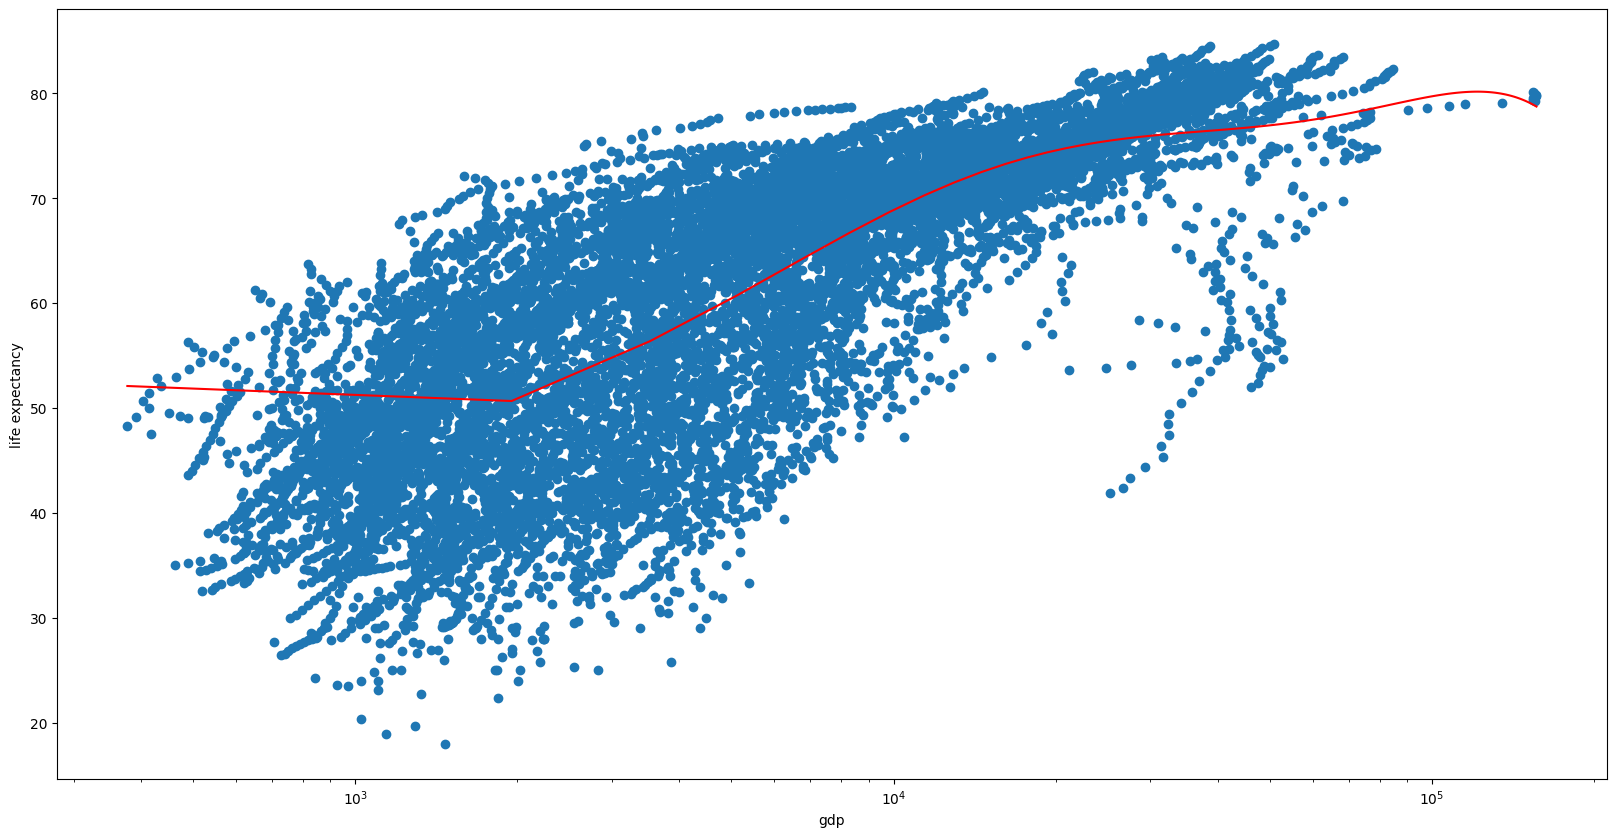

In [9]:
plt.figure(figsize=(20, 10))
plt.scatter(gdp,expectancy)
plt.xlabel("gdp")
plt.ylabel("life expectancy")
plt.xscale("log")
plt.plot(myline, expectancy_fit, color= "red")

Plot the graph alongside the polynomonial regression line.

In [10]:
print(r2_score(expectancy, mymodel(log_gdp)))

0.6165137199322988


Calculate the r2 error

In [15]:
print(mymodel(np.log(65020.35)))

77.7771393826115


Here I carry out a small test. In 2023 the USA's GDP per capita was $65020.35 and its life expectancy in that same year was 78.4 years